In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
#from sklearn.model_selection import train_test_split

In [6]:
df_stock = pd.read_csv('dataTest/BSE_BOM500003.csv')
df_stock = df_stock.filter(['Date', 'Close'], axis=1)
df_stock.columns = ['ds', 'y']
mask1 = df_stock['ds'] < '2016-11-16'
mask2 = df_stock['ds'] > '2016-11-16'
df_train = df_stock[mask1]
df_test = df_stock[mask2]
print df_train.shape
print df_test.shape
#df_test = pd.read_csv('data/test.csv')

(4999, 2)
(250, 2)


In [49]:
df_stock1 = df_stock.filter(['Date', 'Close'], axis=1)
df_test = df_test.filter(['Date', 'Close'], axis=1)
#x = df_stock1.filter(['Date'], axis =1 )
#y = df_stock1.filter(['Close'], axis = 1)

In [2]:
df_stock.plot()

NameError: name 'df_stock1' is not defined

In [50]:
df_stock1.columns = ['ds', 'y']

In [51]:
#df_stock1['y'] = np.log(df_stock1['y'])
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] = np.exp(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [7]:
model = Prophet()
model.fit(df_stock)
future_data = model.make_future_dataframe(periods = 250) 
forecast = model.predict(future_data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:

#forecast[['yhat']][-247:]

In [8]:
forecast_range = forecast[(forecast.ds > "10-5-2016") & (forecast.ds < "10-5-2017")][["ds", "yhat","yhat_lower", "yhat_upper"]]
forecast_range.head()

forecast1 = forecast_range.filter(['ds', 'yhat'], axis=1)

In [9]:
forecast_range = forecast1[::-1]
#forecast_range.head()
forecast_range.info()
forecast_range.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 5219 to 4973
Data columns (total 2 columns):
ds      247 non-null datetime64[ns]
yhat    247 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


,ds,yhat
5219,2017-10-04,233.554955
5218,2017-10-03,233.619227
5217,2017-09-29,234.812265
5216,2017-09-28,236.266890
5215,2017-09-27,237.090259


In [10]:
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%Y-%m-%d',  errors='coerce')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 2 columns):
ds    250 non-null datetime64[ns]
y     250 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


/home/deepika/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
comp = reduce(lambda x, y: pd.merge(df_test, forecast_range, on = 'ds'), df_test.append(forecast_range))
#comp.head()
comp.describe()


,y,yhat
count,220.000000,220.000000
mean,182.068182,251.402373
std,28.099543,10.271601
min,127.500000,233.554955
25%,149.887500,242.586206
50%,189.175000,250.528853
75%,198.650000,260.231422
max,235.350000,272.278410


In [12]:
comp['delta'] = comp.y - comp.yhat
comp.delta.describe()

count    220.000000
mean     -69.334191
std       27.916859
min     -119.860368
25%      -91.010142
50%      -71.514170
75%      -45.271210
max        0.537735
Name: delta, dtype: float64

/home/deepika/miniconda2/lib/python2.7/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


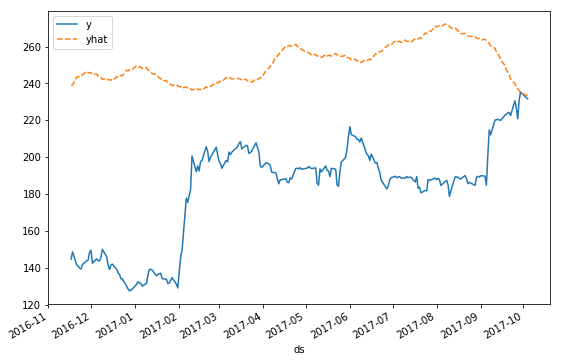

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

comp['ds'] = comp['ds']

fig, ax = plt.subplots(figsize=(9, 6))
comp.plot(kind='line', x='ds', y=['y', 'yhat'], ax=ax, style=['-','--'])
#comp.plot("ds", "delta", ax=ax)
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right');